In [ ]:
import Bio.PDB as biopyPDB
import eval_plots

### 3D view of structure
- within notebook: ipymolstar

In [ ]:
cifparser = biopyPDB.MMCIFParser()
pdbparser = biopyPDB.PDBParser()

structure1 = parser.get_structure("pdb_7rce","model.cif")

### Quality evaluation of Alphafold3 predicted structures using confidence scores

In order to hold practical significance, predicted protein structures must be accompanied by reliable measures of confidence. The output of AlphaFold3 returns confidence measures that can be used to identify regions of the predicted structure, and relative positions of different regions, that are more or less reliable. The main metrics are:

- pLDDT (predicted local distance difference test) and PAE (predicted aligned error)
- pTM (predicted template modeling) and ipTM (interface predicted template modeling ) scores

On a practial basis, the output of Alphafold3 contains these metrics in the following files:

- *_confidences.json
    the PAE and pLDDT
- *summary_confidences_.json
    the pTM and iPTM

#### PAE and pLDDT : Understanding predictive confidence 

These metrics broadly determine how the model trusts its atomic placement on a local(per atom/residue) and global(relative to domains) scale.These can help determine the plausibility of a structure by giving an estimate of how well the prediction will agree with an experimental structure. 


In [ ]:
#import functions and libraries that will aid in parsing and visualizing
import json
from eval_plots import plot_plddt
from eval_plots import plot_pae

##### plDDT
pLDDT measures confidence in the local structure, estimating how well the prediction would agree with an experimental structure. It is based on the local distance difference test Cα (lDDT-Cα), which is a score that does not rely on superposition but assesses the correctness of the local distances (Mariani et al., 2013).

This per-atom confidence estimate is on a 0-100 scale where a higher value indicates higher confidence. pLDDT aims to predict a modified LDDT score that only considers distances to polymers. For proteins this is similar to the lDDT-Cα metric but with more granularity as it can vary per atom not just per residue. For ligand atoms, the modified LDDT considers the errors only between the ligand atom and polymers, not other ligand atoms. For DNA/RNA a wider radius of 30 Å is used for the modified LDDT instead of 15 Å.

The model viewer above can color the 3D model by this scale allowing assement of particular parts of the model
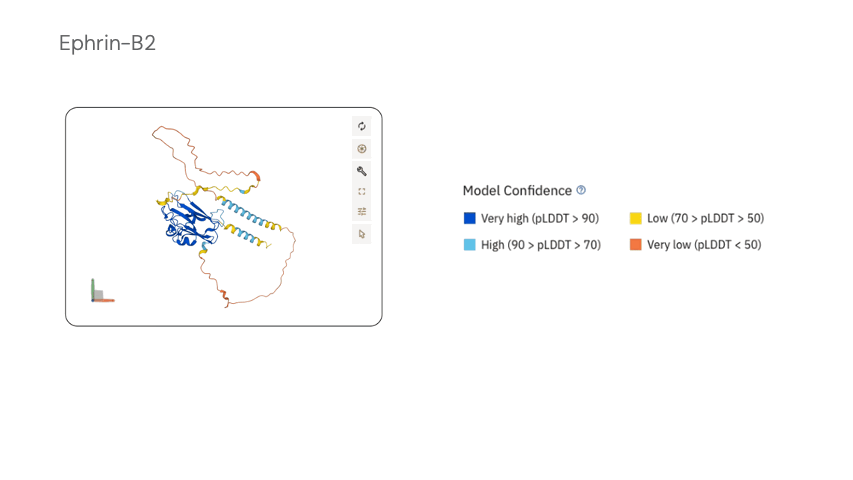

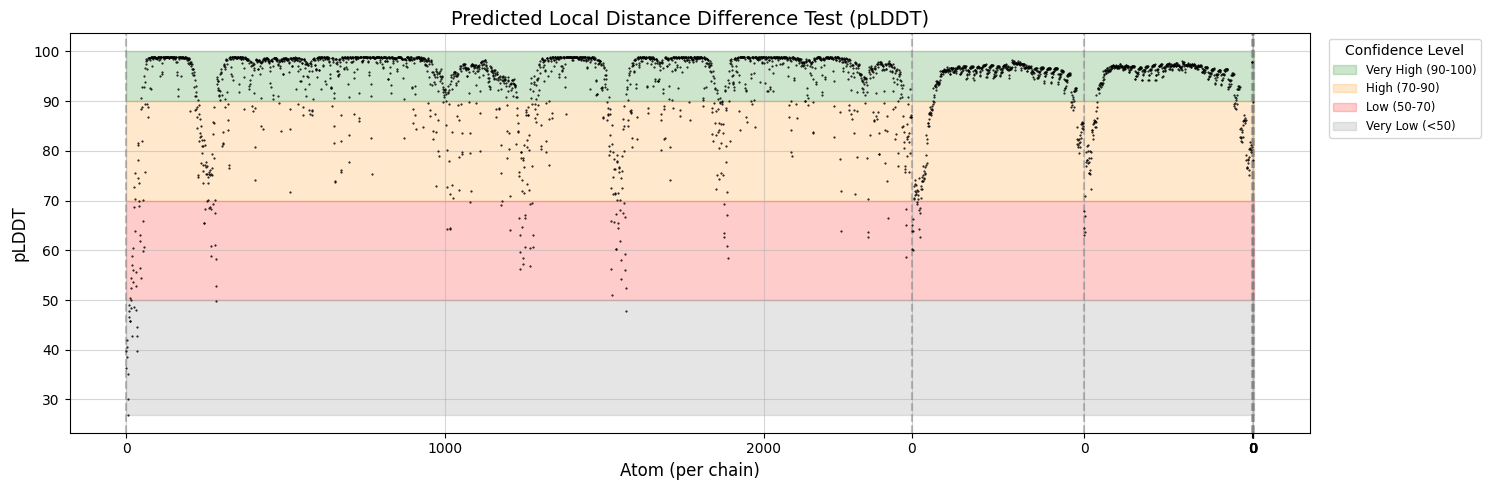

In [2]:
F= open('/home/daedalus/protein-dna-ion_pdb_7rce/protein-dna-ion_pdb_7rce_confidences.json')
data = json.load(F)
plot_plddt(data['atom_plddts'], data['atom_chain_ids'])

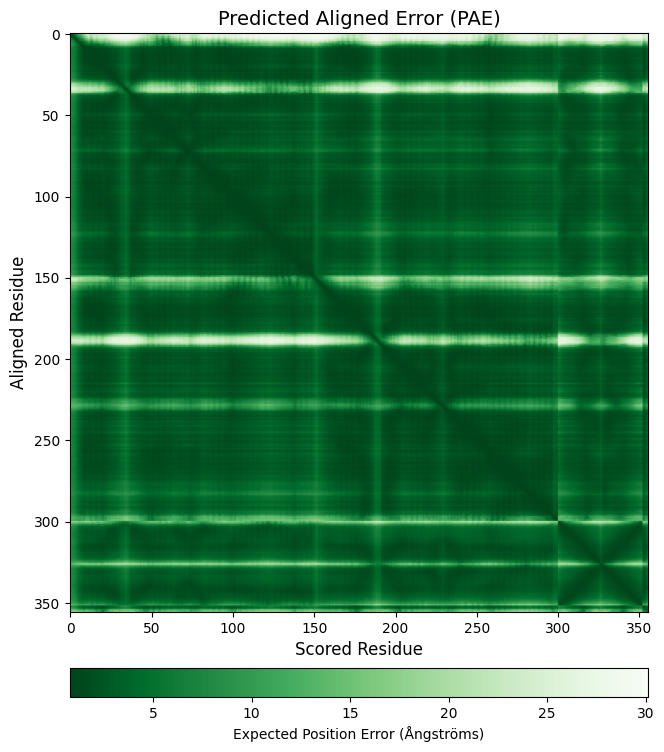

In [ ]:

plot_pae(data['pae'], data['token_chain_ids'], show_chains=False)